# **Zomato data Analysis : Banglore**

# 1. Loading Dataset

In [72]:
import pandas as pd

df = pd.read_csv("zomato.csv")
print(df.head())
print(df.info())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[()]', '', regex=True)


In [5]:
df.dropna(subset=['rate', 'location', 'cuisines'], inplace=True)


In [71]:
# Shape and info
print(df.shape)
df.info()

# Check for nulls
df.isnull().sum()


(51717, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         51717 non-null  object
 1   address                     51717 non-null  object
 2   name                        51717 non-null  object
 3   online_order                51717 non-null  object
 4   book_table                  51717 non-null  object
 5   rate                        43942 non-null  object
 6   votes                       51717 non-null  int64 
 7   phone                       50509 non-null  object
 8   location                    51696 non-null  object
 9   rest_type                   51490 non-null  object
 10  dish_liked                  23639 non-null  object
 11  cuisines                    51672 non-null  object
 12  approx_cost_for_two_people  51371 non-null  object
 13  reviews_list                51717 

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


# 2. UNIVARIATE ANALYSIS


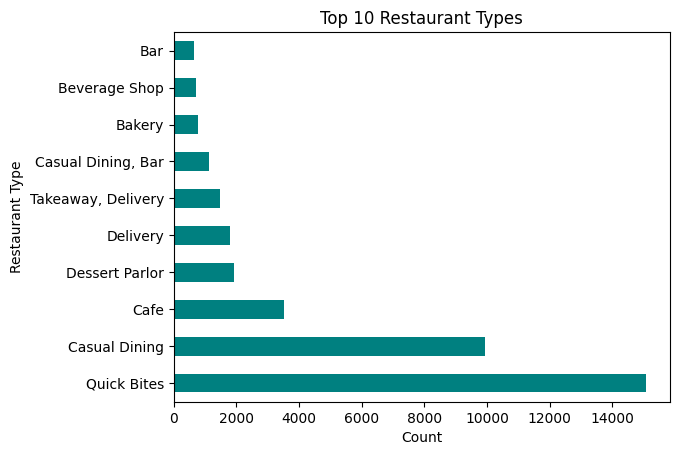

In [19]:
df['rest_type'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()


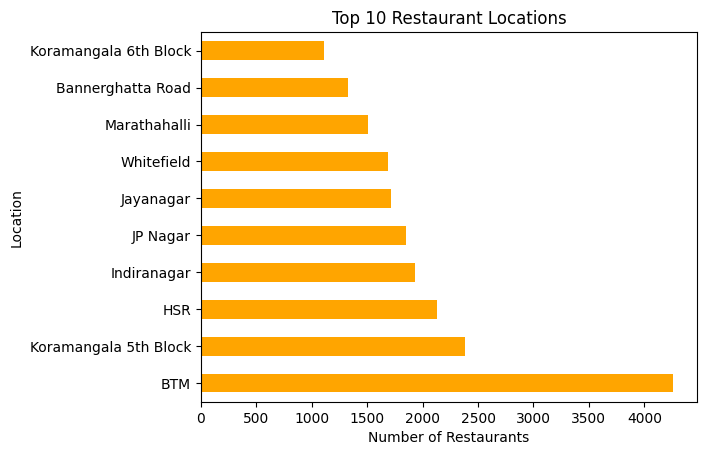

In [20]:
df['location'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Restaurant Locations')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()


/tmp/ipython-input-21-4017695308.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=df, palette='Set2')


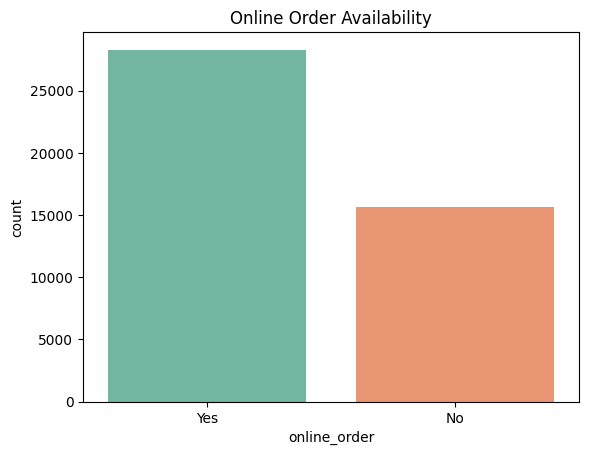

In [21]:
sns.countplot(x='online_order', data=df, palette='Set2')
plt.title('Online Order Availability')
plt.show()


In [82]:
print(df.dtypes)


url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                          float64
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost_for_two_people    float64
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


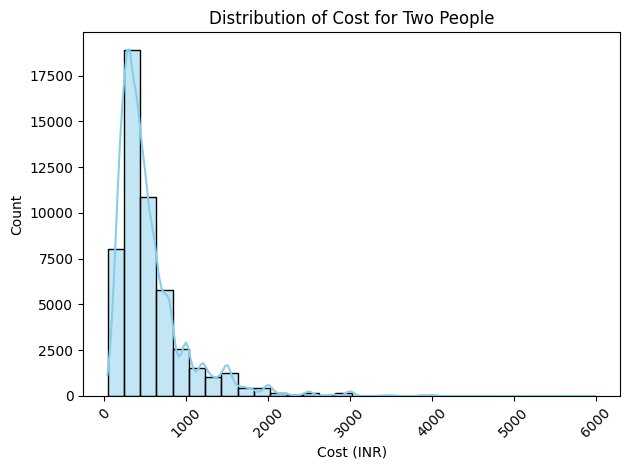

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename column first
df.rename(columns={'approx_cost(for two people)': 'approx_cost_for_two_people'}, inplace=True)

# Clean the cost column
df['approx_cost_for_two_people'] = (
    df['approx_cost_for_two_people']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)
df['approx_cost_for_two_people'] = pd.to_numeric(df['approx_cost_for_two_people'], errors='coerce')

# Now plot with bin size
sns.histplot(df['approx_cost_for_two_people'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Cost for Two People')
plt.xlabel('Cost (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
print(df.columns.tolist())


['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


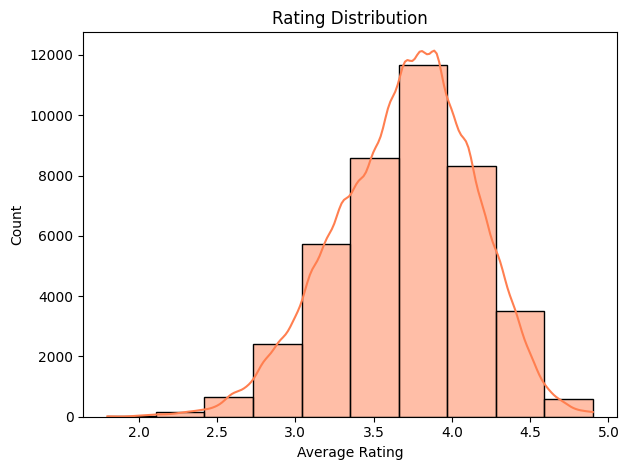

In [84]:
sns.histplot(df['rate'], bins=10, kde=True, color='coral')
plt.title('Rating Distribution')
plt.xlabel('Average Rating')
plt.xticks(rotation=0)  # or 45 if it's still tight
plt.tight_layout()
plt.show()


INSIGHTS :
1. Quick Bites & Casual Dining dominate the platform.
2. BTM & Koramangala are the food hubs of Bangalore.
3. Majority enable online ordering, showing digital adoption.
4. Most restaurants are budget-friendly; high-end dining is also gathering attention.
5. Most ratings are between 3.5–4.2, indicating good customer satisfaction.


# **3. BIVARIATE ANALYSIS**

In [87]:
print(df.columns.tolist())


['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost_for_two_people', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


In [85]:
df.rename(columns={'approx_cost(for two people)': 'approx_cost_for_two_people'}, inplace=True)


In [86]:
print(df.columns.tolist())

['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost_for_two_people', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


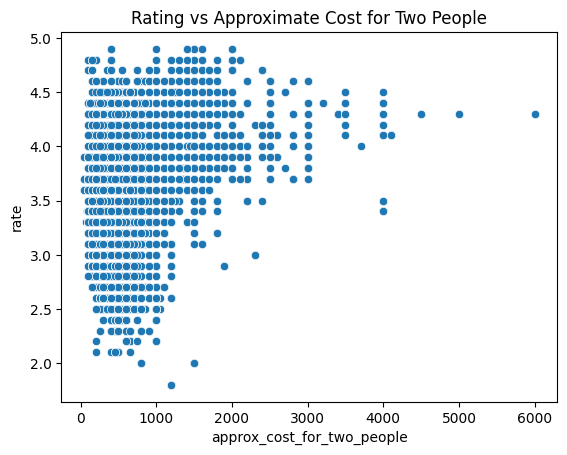

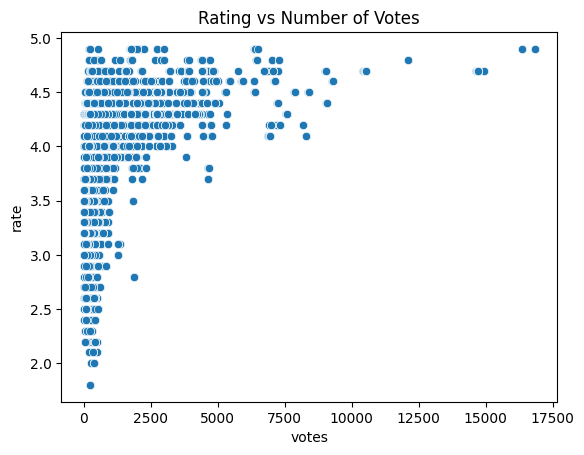

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rate vs Cost
sns.scatterplot(data=df, x='approx_cost_for_two_people', y='rate')
plt.title('Rating vs Approximate Cost for Two People')
plt.show()

# Rate vs Votes
sns.scatterplot(data=df, x='votes', y='rate')
plt.title('Rating vs Number of Votes')
plt.show()



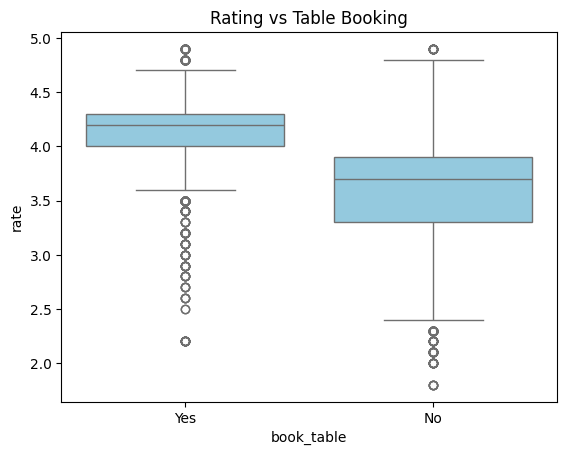

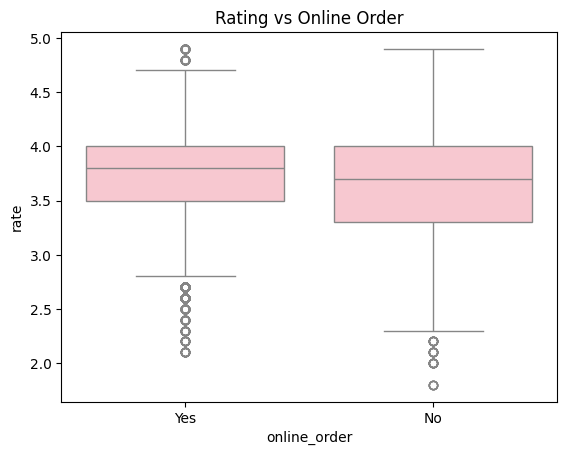

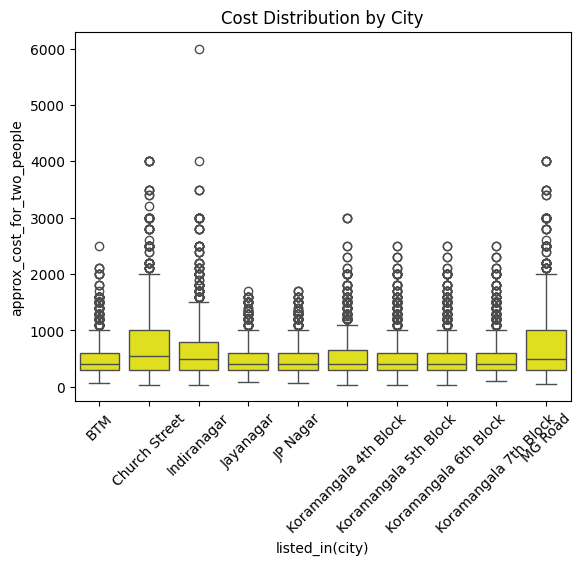

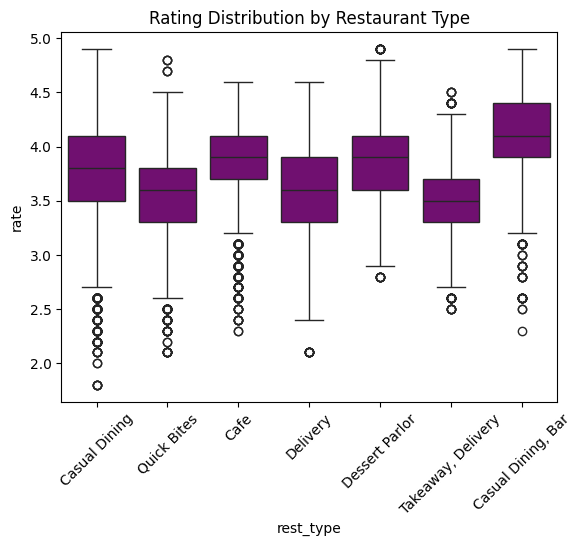

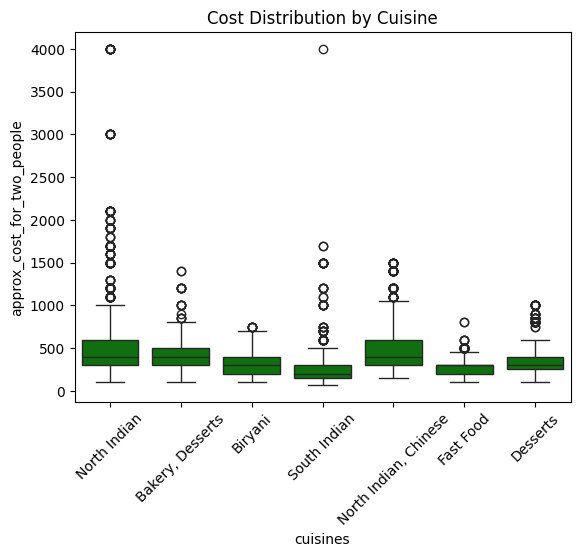

In [96]:
#Rating vs Table Booking
sns.boxplot(data=df, x='book_table', y='rate',color='skyblue')
plt.title('Rating vs Table Booking')
plt.show()


#Rating vs Online Order
sns.boxplot(data=df, x='online_order', y='rate',color='pink')
plt.title('Rating vs Online Order')
plt.show()


#Cost Distribution by City
top_cities = df['listed_in(city)'].value_counts().head(10).index
df_top_city = df[df['listed_in(city)'].isin(top_cities)]

sns.boxplot(data=df_top_city, x='listed_in(city)', y='approx_cost_for_two_people',color='yellow')
plt.xticks(rotation=45)
plt.title('Cost Distribution by City')
plt.show()


#Rating Distribution by Restaurant Type
top_types = df['rest_type'].value_counts().head(7).index
df_rest_type = df[df['rest_type'].isin(top_types)]

sns.boxplot(data=df_rest_type, x='rest_type', y='rate',color='purple')
plt.xticks(rotation=45)
plt.title('Rating Distribution by Restaurant Type')
plt.show()


#Cost Distribution by Cuisine
top_cuisines = df['cuisines'].value_counts().head(7).index
df_cuisine = df[df['cuisines'].isin(top_cuisines)]

sns.boxplot(data=df_cuisine, x='cuisines', y='approx_cost_for_two_people',color='green')
plt.xticks(rotation=45)
plt.title('Cost Distribution by Cuisine')
plt.show()

In [97]:
# Clean 'rate' column
df['rate'] = df['rate'].astype(str)  # ensure strings
df['rate'] = df['rate'].str.extract(r'(\d+\.?\d*)')  # extract number part like 4.1
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # convert to float


In [98]:
# Clean 'approx_cost_for_two_people' column
df.rename(columns={'approx_cost(for two people)': 'approx_cost_for_two_people'}, inplace=True)
df['approx_cost_for_two_people'] = (
    df['approx_cost_for_two_people']
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.strip()
)

df['approx_cost_for_two_people'] = pd.to_numeric(df['approx_cost_for_two_people'], errors='coerce')


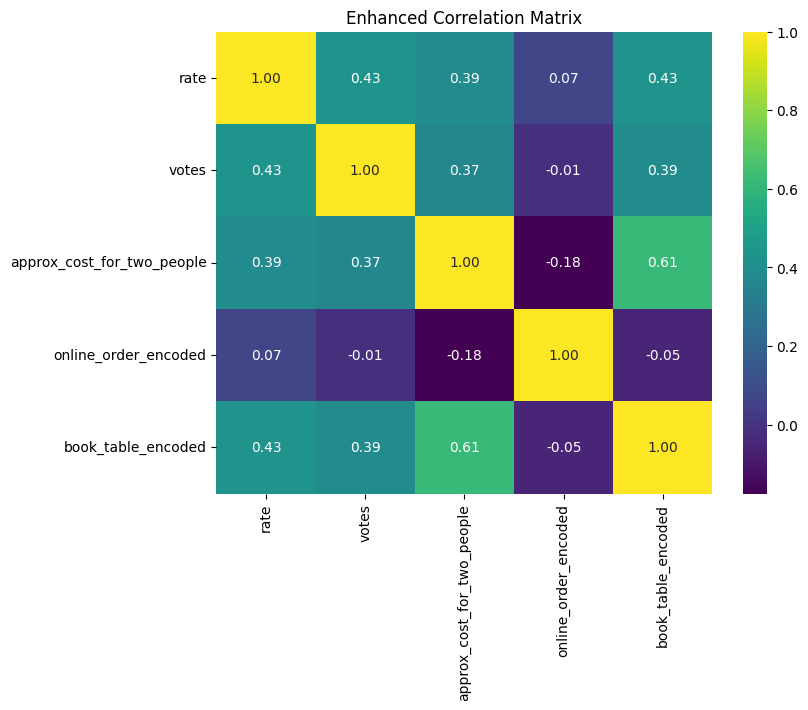

In [100]:


# Step 1: Make copies of the original df and encode categorical flags
df_corr = df.copy()

# Encoding binary categories
df_corr['online_order_encoded'] = df_corr['online_order'].map({'Yes': 1, 'No': 0})
df_corr['book_table_encoded'] = df_corr['book_table'].map({'Yes': 1, 'No': 0})

# Drop rows with NaN in numeric columns used
df_corr = df_corr[['rate', 'votes', 'approx_cost_for_two_people',
                   'online_order_encoded', 'book_table_encoded']].dropna()

# Step 2: Plot enhanced correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Enhanced Correlation Matrix")
plt.show()


INSIGHTS :
1. 500 < approx cost for two people < 2000 has the best ratings as they provide good food in affordable range
2. Table booking and Online order option availability leads to a better impression on customers
3. Church Street and MG Road are a bit on expensive side.
4. Cafe and casual dining, bar have the most popularity.